In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
defunciones = pd.read_csv("../data/def_euskadi.csv", encoding='ISO-8859-1', skiprows=1)
defunciones

,grandes grupos CIE-10,mes,tramo edad cumplida,sexo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,I. Ciertas enfermedades infecciosas y parasita...,Enero,0,Hombres,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,I. Ciertas enfermedades infecciosas y parasita...,Enero,0,Mujeres,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,I. Ciertas enfermedades infecciosas y parasita...,Enero,1 - 9,Hombres,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,I. Ciertas enfermedades infecciosas y parasita...,Enero,1 - 9,Mujeres,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,I. Ciertas enfermedades infecciosas y parasita...,Enero,10 - 19,Hombres,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,Covid-19 Probable,Diciembre,70 - 79,Mujeres,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5540,Covid-19 Probable,Diciembre,80 - 89,Hombres,0,0,0,0,0,0,0,0,0,0,2,0,0,0
5541,Covid-19 Probable,Diciembre,80 - 89,Mujeres,0,0,0,0,0,0,0,0,0,0,3,1,0,0
5542,Covid-19 Probable,Diciembre,>= 90,Hombres,0,0,0,0,0,0,0,0,0,0,3,0,1,0


In [3]:
# convertir las variables a numeros 

#pasar de meses a números
meses_num = { 
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
}
defunciones['mes'] = defunciones['mes'].map(meses_num)

#pasar de enfermedades a números
enfermedades = {
    'I. Ciertas enfermedades infecciosas y parasitarias (A00 - B99)': 1,
    'II. Tumores [neoplasias] (C00 - D48)': 2,
    'III. Enferm. sangre y órganos hematop., ciertos trast. inmunidad (D50-D89)': 3,
    'IV. Enfermedades endocrinas, nutricionales y metabólicas (E00 - E90)': 4,
    'V. Trastornos mentales y del comportamiento (F00 - F99)': 5,
    'VI. Enfermedades del sistema nervioso (G00 - G99)': 6,
    'VII. Enfermedades del ojo y sus anexos (H00 - H59)': 7,
    'VIII. Enfermedades del oído y de la apófisis mastoides (H60 - H95)': 8,
    'IX. Enfermedades del sistema circulatorio (I00 - I99)': 9,
    'X. Enfermedades del sistema respiratorio (J00 - J99)': 10,
    'XI. Enfermedades del sistema digestivo (K00 - K93)': 11,
    'XII. Enfermedades de la piel y del tejido subcutáneo (L00 - L99)': 12,
    'XIII. Enfermedades sistema osteomuscular y tejido conjuntivo (M00 - M99)': 13,
    'XIV. Enfermedades del sistema genitourinario (N00 - N99)': 14,
    'XV. Embarazo, parto y puerperio (O00 - O99)': 15,
    'XVI. Ciertas afecciones originadas en el período perinatal (P00 - P96)': 16,
    'XVII. Malformaciones congén., deformidades y anomalías cromos. (Q00 - Q99)': 17,
    'XVIII. Síntomas, signos y hallazgos anormales clínicos y labor. (R00 - R99)': 18,
    'XX. Causas externas de mortalidad (V01 - Y89)': 19,
    'Covid-19 Confirmado': 20,
    'Covid-19 Probable': 21
}

defunciones['grandes grupos CIE-10'] = defunciones['grandes grupos CIE-10'].map(enfermedades)

#pasar de tramo edad a números
edad_a_numeros = {
    '0': 1,
    '1 - 9': 2,
    '10 - 19': 3,
    '20 - 29': 4,
    '30 - 39': 5,
    '40 - 49': 6,
    '50 - 59': 7,
    '60 - 69': 8,
    '70 - 79': 9,
    '80 - 89': 10,
    '>= 90': 11
}

defunciones['tramo edad cumplida'] = defunciones['tramo edad cumplida'].map(edad_a_numeros)

#pasar sexo a número
sexo_num = {'Hombres': 0, 'Mujeres': 1}
defunciones['sexo'] = defunciones['sexo'].map(sexo_num)

# Crear columnas por rango de años
defunciones['rango1'] = defunciones[['2010', '2011', '2012', '2013', '2014']].sum(axis=1)

defunciones['rango2'] = defunciones[['2015', '2016', '2017', '2018', '2019']].sum(axis=1)

defunciones['rango3'] = defunciones[['2020', '2021', '2022', '2023']].sum(axis=1)

defunciones['Defunciones'] = defunciones[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']].sum(axis=1)

In [4]:
defunciones[['tramo edad cumplida', 'mes', 'grandes grupos CIE-10', 'sexo', 'rango1', 'rango2', 'rango3', 'Defunciones']].head()

,tramo edad cumplida,mes,grandes grupos CIE-10,sexo,rango1,rango2,rango3,Defunciones
0,1,1,1,0,0,0,0,0
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,0,0,0
3,2,1,1,1,1,0,0,1
4,3,1,1,0,0,0,0,0


In [5]:
defunciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grandes grupos CIE-10  5544 non-null   int64
 1   mes                    5544 non-null   int64
 2   tramo edad cumplida    5544 non-null   int64
 3   sexo                   5544 non-null   int64
 4   2010                   5544 non-null   int64
 5   2011                   5544 non-null   int64
 6   2012                   5544 non-null   int64
 7   2013                   5544 non-null   int64
 8   2014                   5544 non-null   int64
 9   2015                   5544 non-null   int64
 10  2016                   5544 non-null   int64
 11  2017                   5544 non-null   int64
 12  2018                   5544 non-null   int64
 13  2019                   5544 non-null   int64
 14  2020                   5544 non-null   int64
 15  2021                   5544 non-null  

In [6]:
# estandarizar
cols_to_scale = ['rango1', 'rango2', 'rango3', 'Defunciones']

# Estandarizar columnas
scaler = StandardScaler()
defunciones[cols_to_scale] = scaler.fit_transform(defunciones[cols_to_scale])

defunciones.head()

,grandes grupos CIE-10,mes,tramo edad cumplida,sexo,2010,2011,2012,2013,2014,2015,...,2018,2019,2020,2021,2022,2023,rango1,rango2,rango3,Defunciones
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.288778,-0.293788,-0.32259,-0.304358
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.288778,-0.293788,-0.32259,-0.304358
2,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.288778,-0.293788,-0.32259,-0.304358
3,1,1,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,-0.272658,-0.293788,-0.32259,-0.298748
4,1,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.288778,-0.293788,-0.32259,-0.304358


In [7]:
# Calcular correlación
correlation_matrix = defunciones.corr()
correlation_matrix

,grandes grupos CIE-10,mes,tramo edad cumplida,sexo,2010,2011,2012,2013,2014,2015,...,2018,2019,2020,2021,2022,2023,rango1,rango2,rango3,Defunciones
grandes grupos CIE-10,1.000000e+00,-6.858493e-16,-3.319741e-15,1.428680e-18,-0.186886,-0.187235,-0.181879,-0.187287,-0.187223,-0.183983,...,-0.185806,-0.187093,-0.112304,-0.151263,-0.152942,-0.181312,-0.188164,-0.186097,-0.153880,-0.179766
mes,-6.858493e-16,1.000000e+00,-1.493402e-16,8.353570e-19,0.000463,-0.002400,-0.019906,-0.002901,-0.010453,-0.026409,...,-0.021109,-0.012096,-0.009174,0.002518,-0.010496,-0.008500,-0.007225,-0.016170,-0.006695,-0.010480
tramo edad cumplida,-3.319741e-15,-1.493402e-16,1.000000e+00,-2.685053e-18,0.298287,0.300966,0.307601,0.312410,0.316521,0.321480,...,0.330610,0.336983,0.350403,0.357607,0.373326,0.358118,0.310619,0.331743,0.372447,0.340703
sexo,1.428680e-18,8.353570e-19,-2.685053e-18,1.000000e+00,-0.010694,-0.010894,-0.005928,-0.009969,-0.002818,-0.000255,...,-0.000188,0.000656,0.001697,-0.000770,0.006217,0.003348,-0.008121,-0.000950,0.002706,-0.002382
2010,-1.868860e-01,4.627595e-04,2.982869e-01,-1.069357e-02,1.000000,0.976033,0.968832,0.974670,0.969450,0.958460,...,0.952248,0.947954,0.842062,0.915809,0.899356,0.924629,0.988665,0.965414,0.925946,0.974501
2011,-1.872346e-01,-2.399975e-03,3.009662e-01,-1.089356e-02,0.976033,1.000000,0.970105,0.974549,0.972673,0.961601,...,0.955686,0.951603,0.842055,0.914349,0.897083,0.923366,0.989645,0.968710,0.924672,0.975689
2012,-1.818795e-01,-1.990561e-02,3.076008e-01,-5.927710e-03,0.968832,0.970105,1.000000,0.972323,0.969422,0.973736,...,0.962316,0.954356,0.848841,0.913228,0.900932,0.934114,0.987246,0.974249,0.929917,0.978451
2013,-1.872867e-01,-2.900590e-03,3.124104e-01,-9.969006e-03,0.974670,0.974549,0.972323,1.000000,0.976293,0.968116,...,0.966274,0.961274,0.848974,0.921576,0.910553,0.935762,0.990454,0.976980,0.934969,0.982067
2014,-1.872226e-01,-1.045279e-02,3.165210e-01,-2.818023e-03,0.969450,0.972673,0.969422,0.976293,1.000000,0.968477,...,0.967715,0.965409,0.853756,0.926527,0.911389,0.941350,0.988548,0.979021,0.939147,0.983390
2015,-1.839827e-01,-2.640892e-02,3.214799e-01,-2.548194e-04,0.958460,0.961601,0.973736,0.968116,0.968477,1.000000,...,0.973725,0.967843,0.852551,0.915551,0.907545,0.943039,0.976978,0.987838,0.935454,0.981547


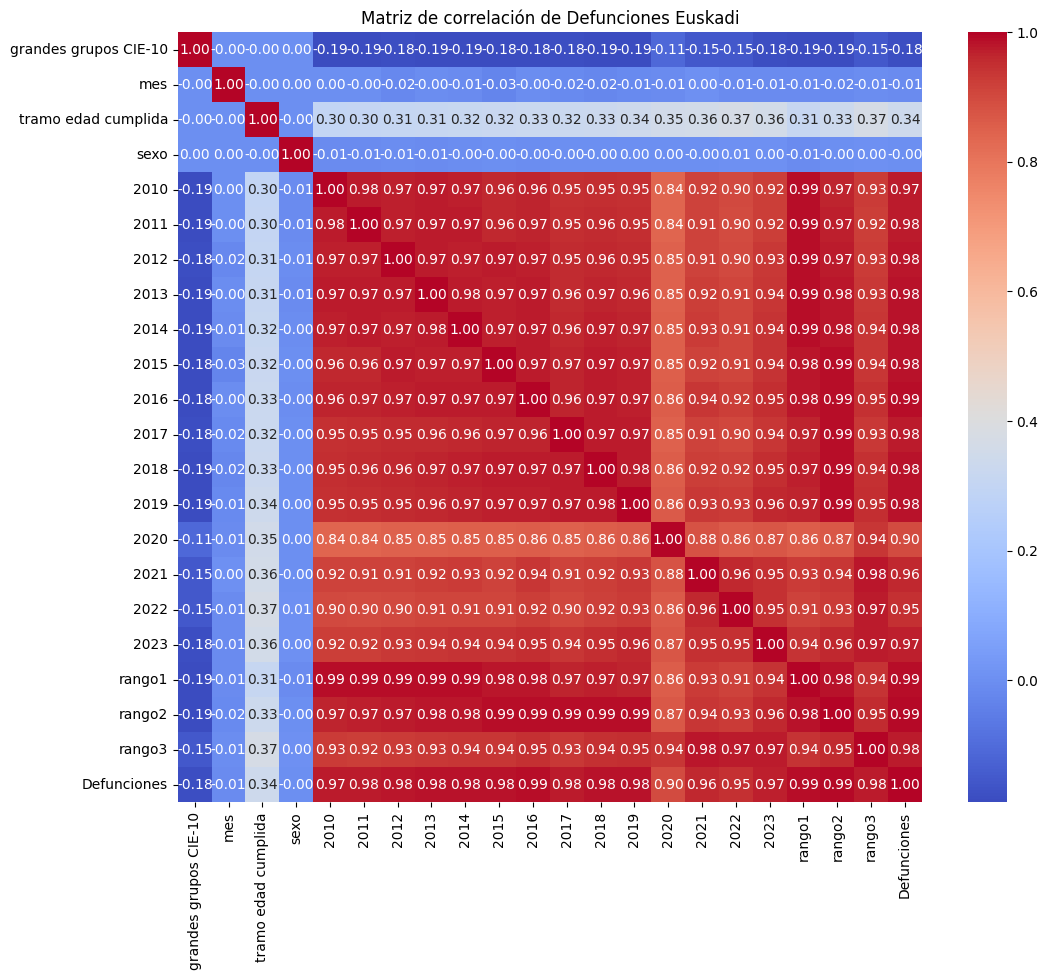

In [8]:
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de Defunciones Euskadi')
plt.show()

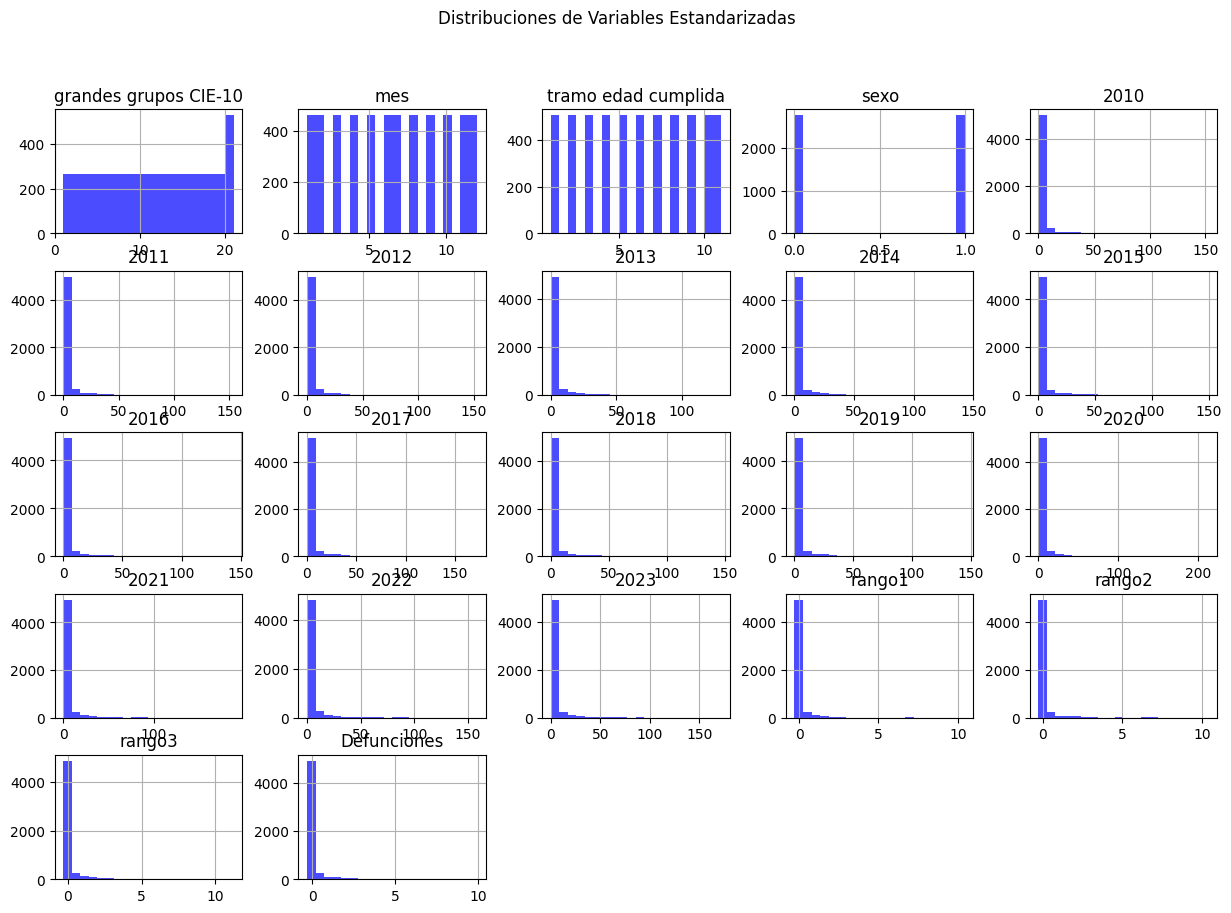

In [9]:
# Visualización de las distribuciones de las variables estandarizadas
defunciones.hist(bins=20, figsize=(15, 10), color='b', alpha=0.7)
plt.suptitle('Distribuciones de Variables Estandarizadas')
plt.show()


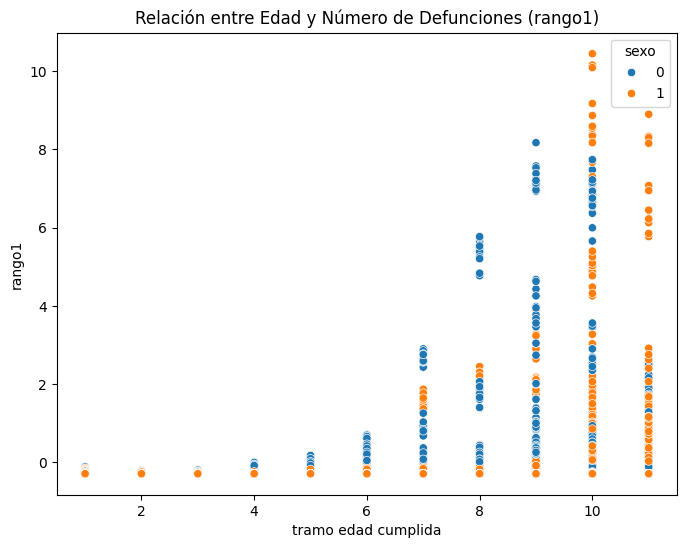

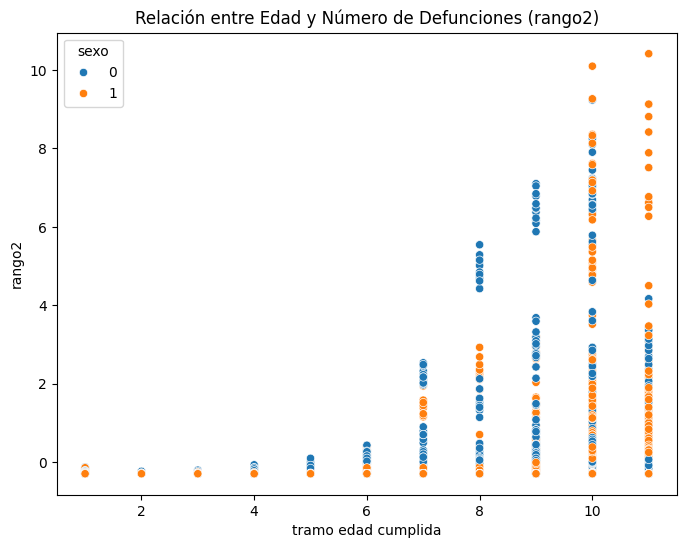

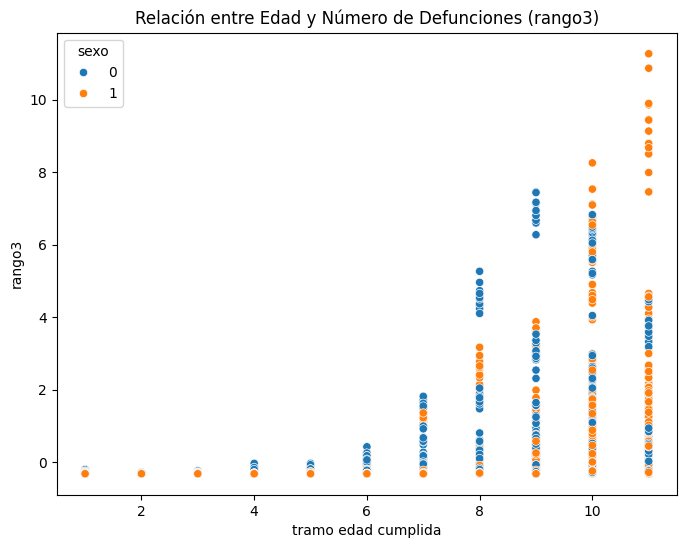

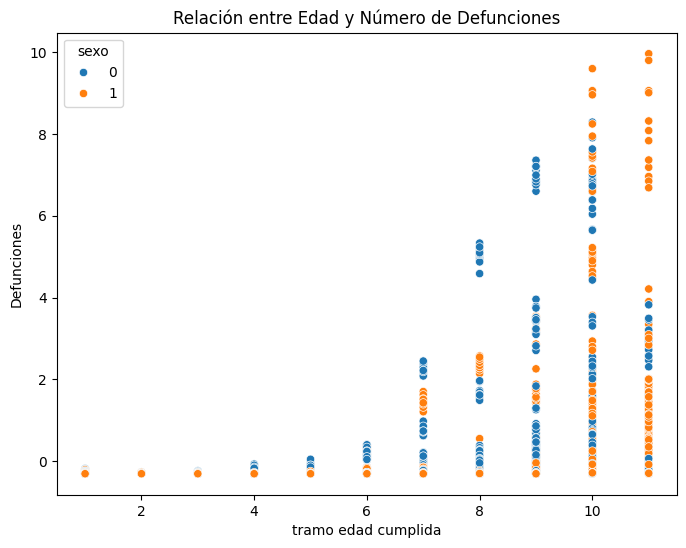

In [10]:
# Relación entre edad y número de defunciones (rango1)
plt.figure(figsize=(8,6))
sns.scatterplot(x='tramo edad cumplida', y='rango1', hue='sexo', data=defunciones)
plt.title('Relación entre Edad y Número de Defunciones (rango1)')
plt.show()

# Relación entre edad y número de defunciones (rango2)
plt.figure(figsize=(8,6))
sns.scatterplot(x='tramo edad cumplida', y='rango2', hue='sexo', data=defunciones)
plt.title('Relación entre Edad y Número de Defunciones (rango2)')
plt.show()

# Relación entre edad y número de defunciones (rango3)
plt.figure(figsize=(8,6))
sns.scatterplot(x='tramo edad cumplida', y='rango3', hue='sexo', data=defunciones)
plt.title('Relación entre Edad y Número de Defunciones (rango3)')
plt.show()

# Relación entre edad y número de defunciones (rango3)
plt.figure(figsize=(8,6))
sns.scatterplot(x='tramo edad cumplida', y='Defunciones', hue='sexo', data=defunciones)
plt.title('Relación entre Edad y Número de Defunciones')
plt.show()

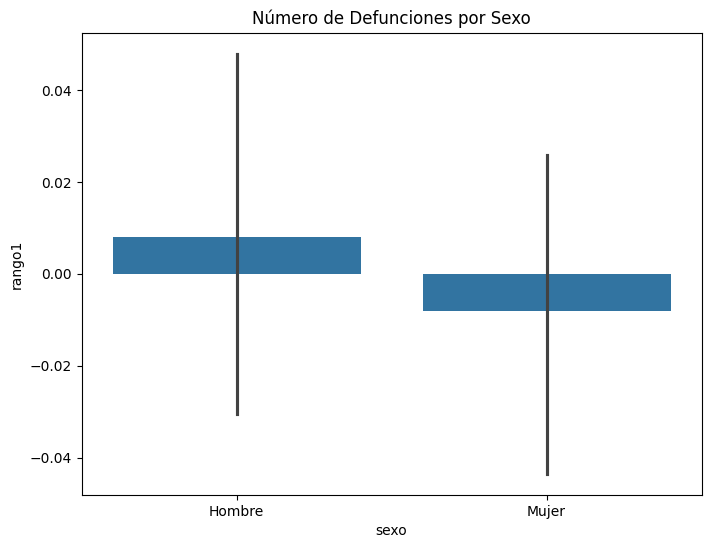

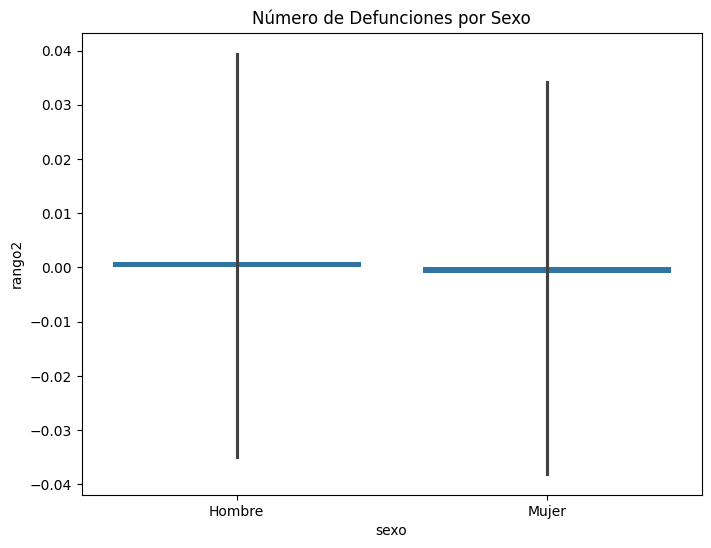

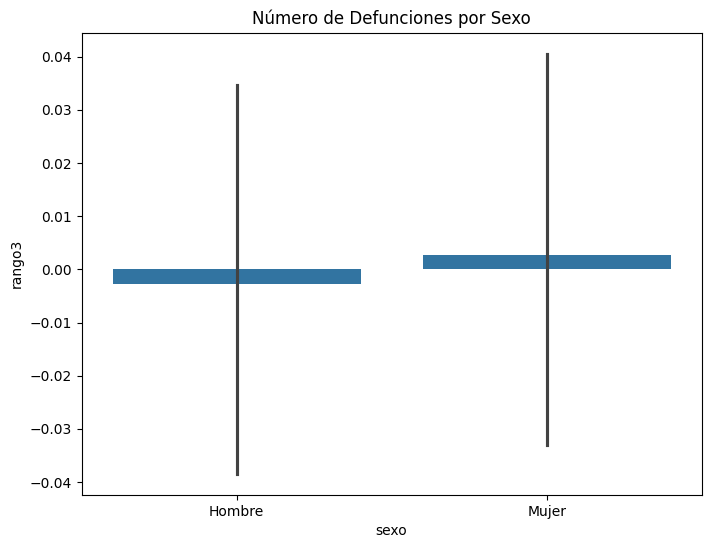

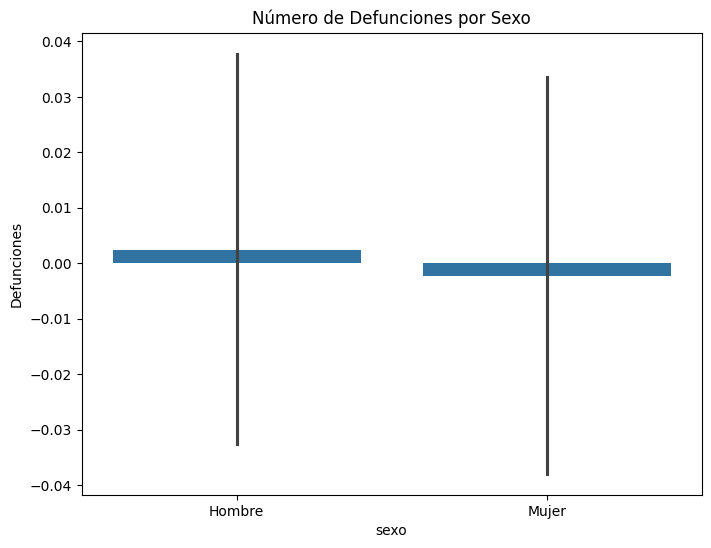

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras por sexo rango1
plt.figure(figsize=(8,6))
sns.barplot(x='sexo', y='rango1', data=defunciones)
plt.title('Número de Defunciones por Sexo')
plt.xticks(ticks=[0, 1], labels=['Hombre', 'Mujer'])
plt.show()

# Gráfico de barras por sexo rango2
plt.figure(figsize=(8,6))
sns.barplot(x='sexo', y='rango2', data=defunciones)
plt.title('Número de Defunciones por Sexo')
plt.xticks(ticks=[0, 1], labels=['Hombre', 'Mujer'])
plt.show()

# Gráfico de barras por sexo rango3
plt.figure(figsize=(8,6))
sns.barplot(x='sexo', y='rango3', data=defunciones)
plt.title('Número de Defunciones por Sexo')
plt.xticks(ticks=[0, 1], labels=['Hombre', 'Mujer'])
plt.show()

# Gráfico de barras por sexo
plt.figure(figsize=(8,6))
sns.barplot(x='sexo', y='Defunciones', data=defunciones)
plt.title('Número de Defunciones por Sexo')
plt.xticks(ticks=[0, 1], labels=['Hombre', 'Mujer'])
plt.show()

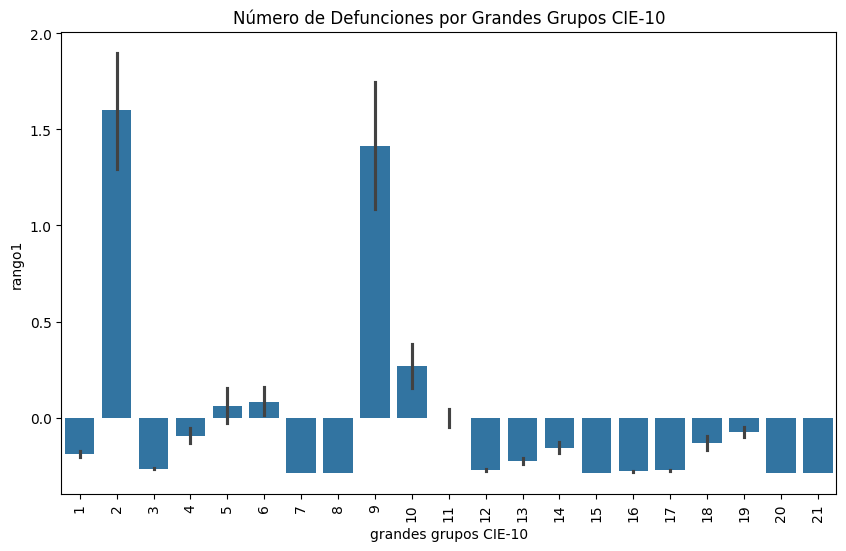

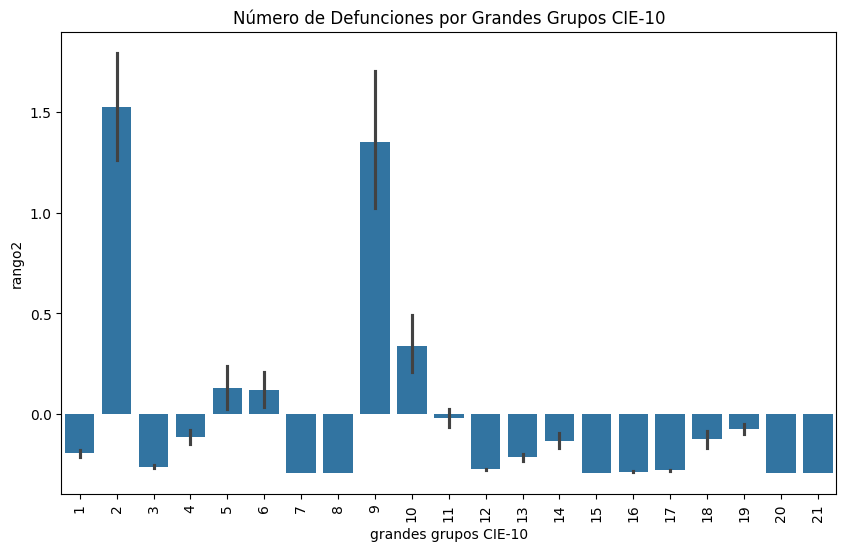

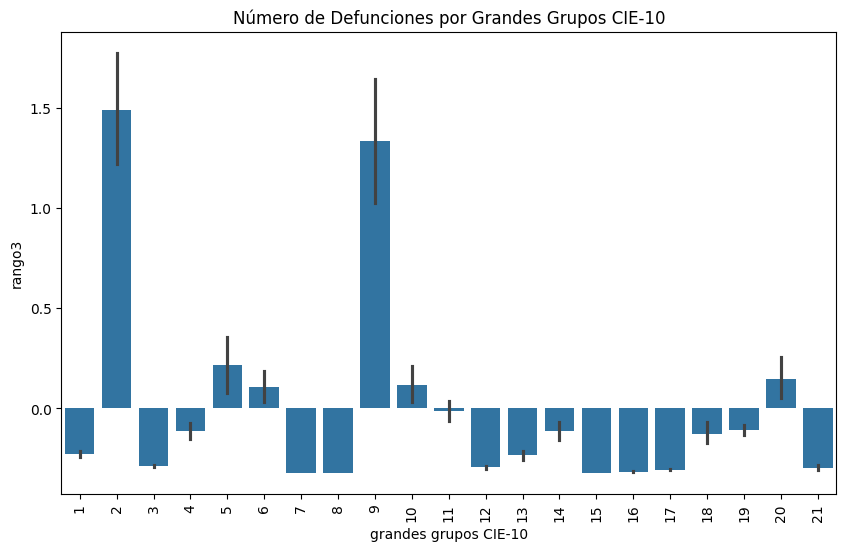

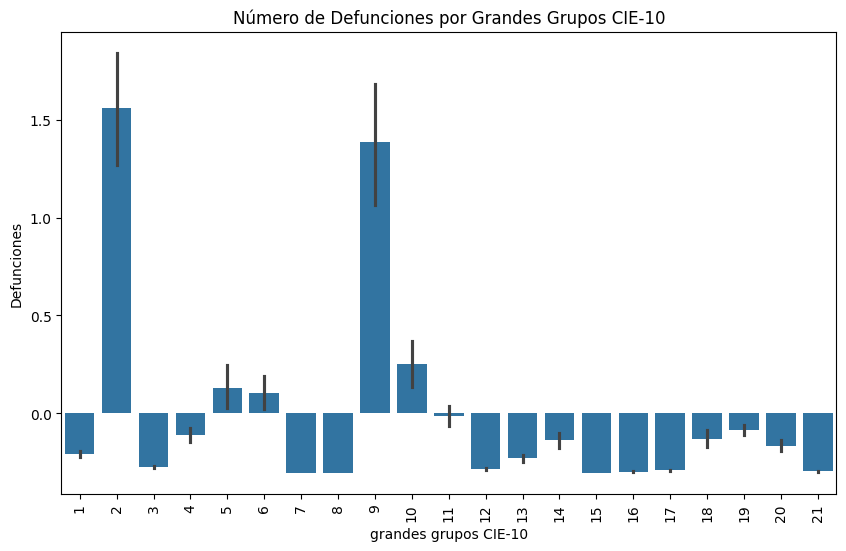

In [12]:
# Gráfico de barras por grandes grupos CIE-10 rango1
plt.figure(figsize=(10,6))
sns.barplot(x='grandes grupos CIE-10', y='rango1', data=defunciones)
plt.title('Número de Defunciones por Grandes Grupos CIE-10')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras por grandes grupos CIE-10 rango2
plt.figure(figsize=(10,6))
sns.barplot(x='grandes grupos CIE-10', y='rango2', data=defunciones)
plt.title('Número de Defunciones por Grandes Grupos CIE-10')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras por grandes grupos CIE-10 rango3
plt.figure(figsize=(10,6))
sns.barplot(x='grandes grupos CIE-10', y='rango3', data=defunciones)
plt.title('Número de Defunciones por Grandes Grupos CIE-10')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras por grandes grupos CIE-10 
plt.figure(figsize=(10,6))
sns.barplot(x='grandes grupos CIE-10', y='Defunciones', data=defunciones)
plt.title('Número de Defunciones por Grandes Grupos CIE-10')
plt.xticks(rotation=90)
plt.show()


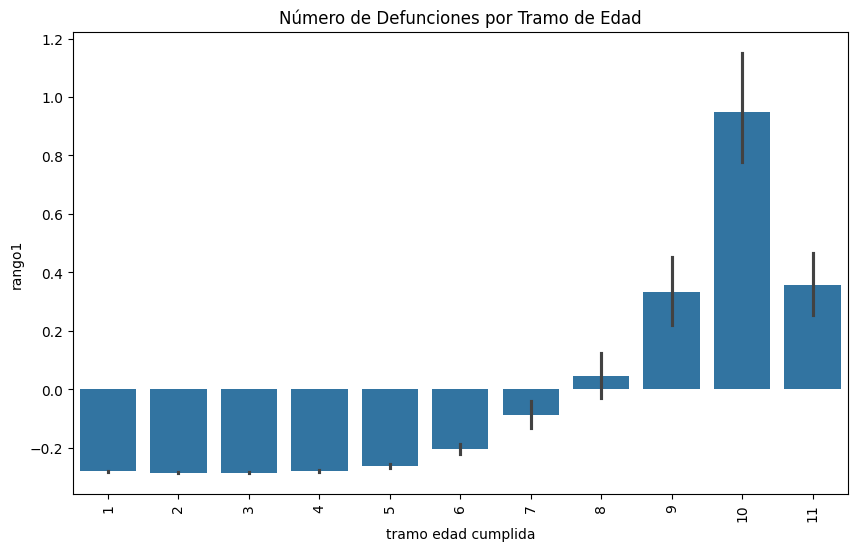

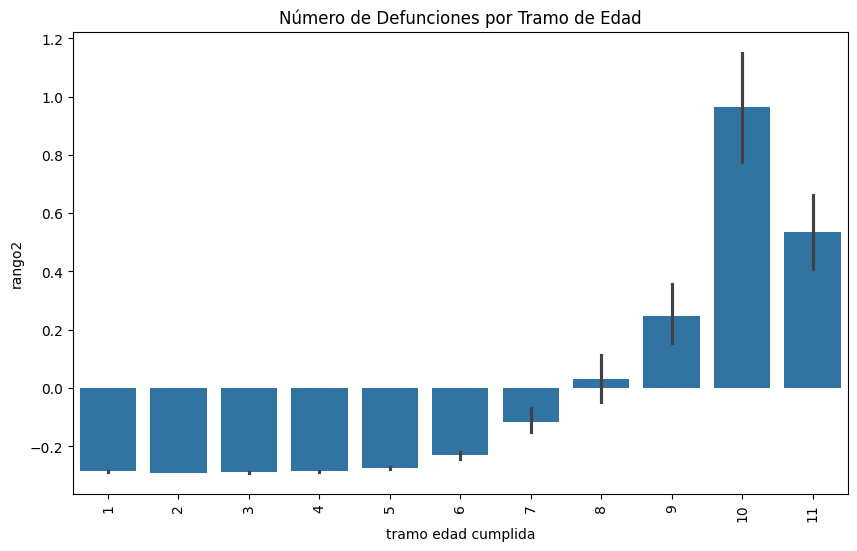

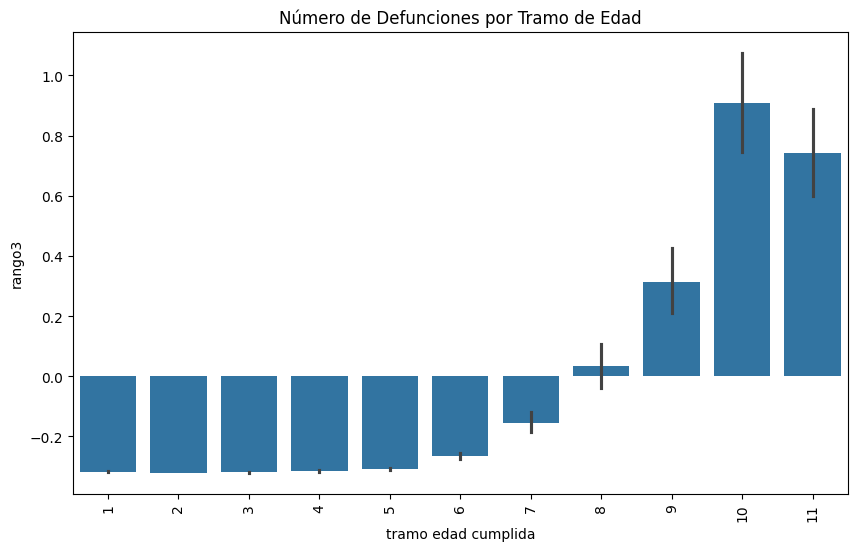

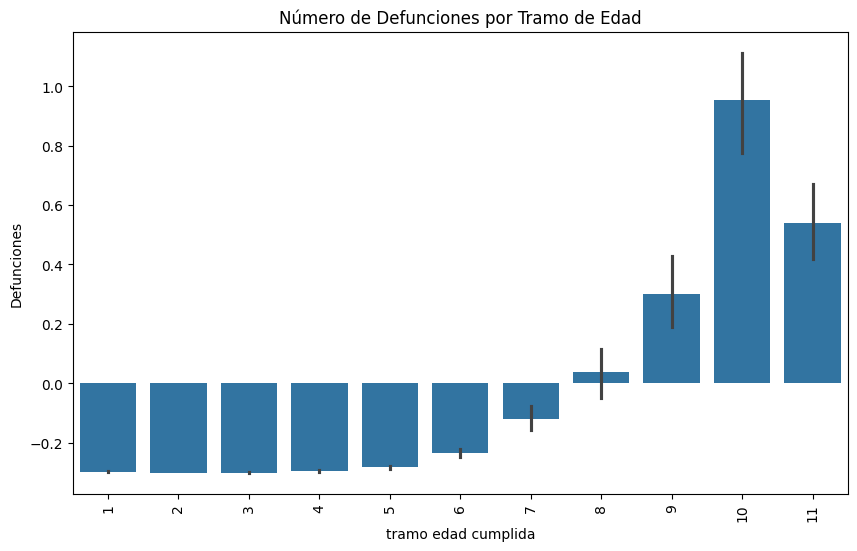

In [13]:
# Gráfico de barras por tramo de edad rango1
plt.figure(figsize=(10,6))
sns.barplot(x='tramo edad cumplida', y='rango1', data=defunciones)
plt.title('Número de Defunciones por Tramo de Edad')
plt.xticks(rotation=90)  
plt.show()

# Gráfico de barras por tramo de edad rango2
plt.figure(figsize=(10,6))
sns.barplot(x='tramo edad cumplida', y='rango2', data=defunciones)
plt.title('Número de Defunciones por Tramo de Edad')
plt.xticks(rotation=90)  
plt.show()

# Gráfico de barras por tramo de edad rango3
plt.figure(figsize=(10,6))
sns.barplot(x='tramo edad cumplida', y='rango3', data=defunciones)
plt.title('Número de Defunciones por Tramo de Edad')
plt.xticks(rotation=90)  
plt.show()

# Gráfico de barras por tramo de edad 
plt.figure(figsize=(10,6))
sns.barplot(x='tramo edad cumplida', y='Defunciones', data=defunciones)
plt.title('Número de Defunciones por Tramo de Edad')
plt.xticks(rotation=90)  
plt.show()

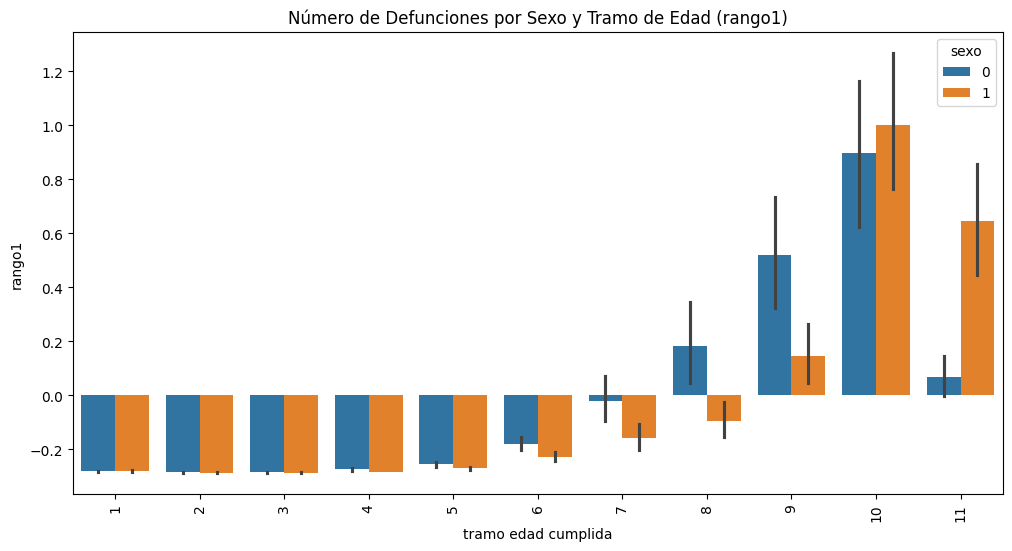

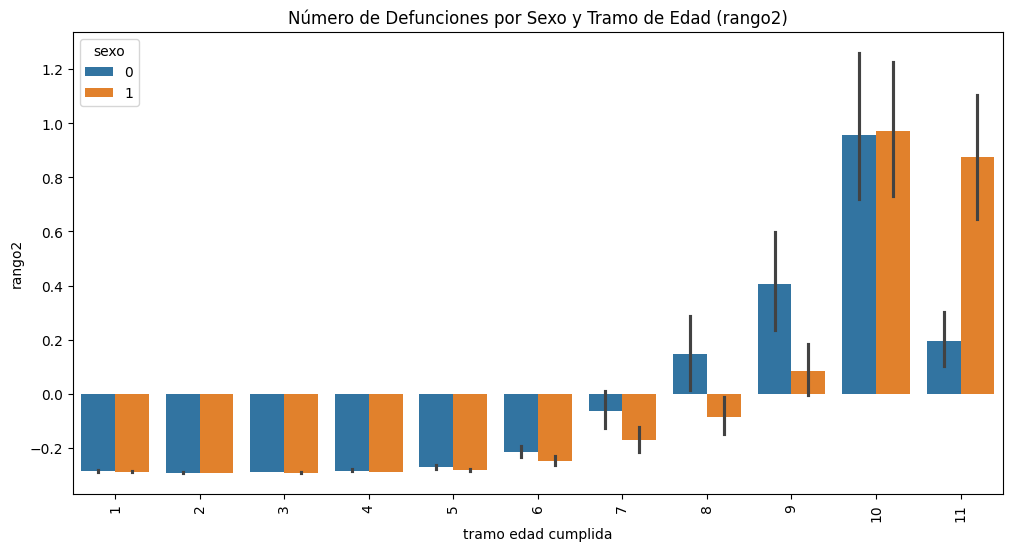

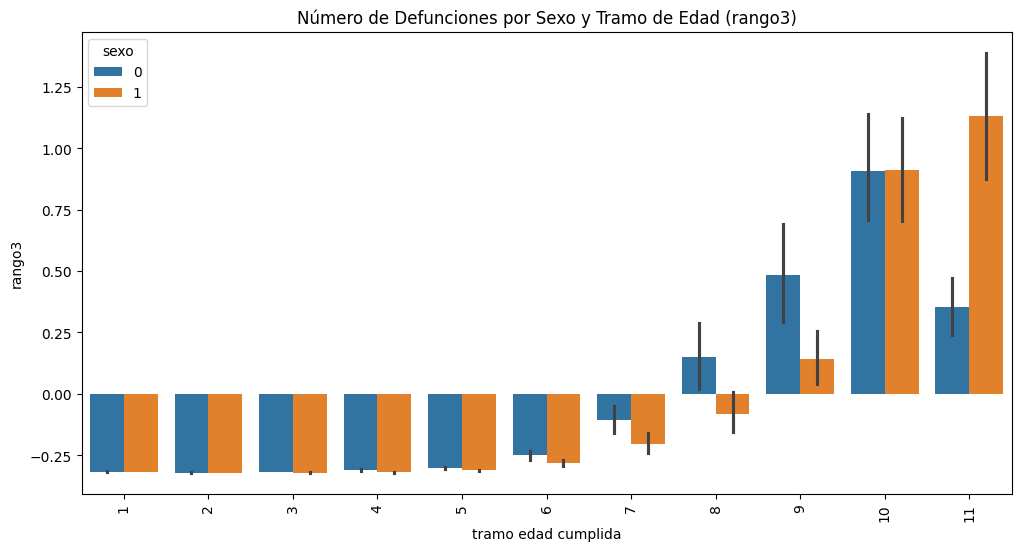

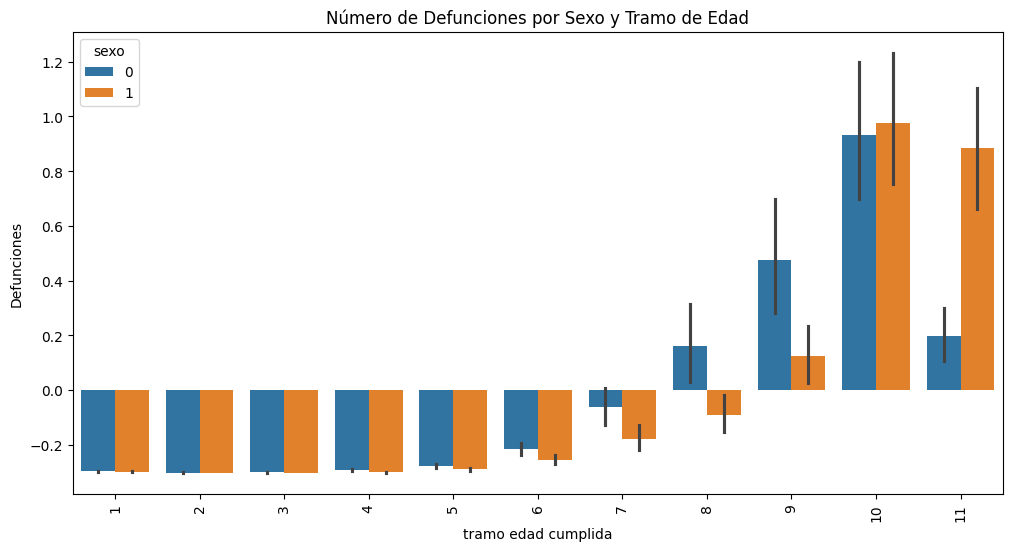

In [14]:
# Gráfico de barras combinado entre sexo y tramo de edad rango1
plt.figure(figsize=(12,6))
sns.barplot(x='tramo edad cumplida', y='rango1', hue='sexo', data=defunciones)
plt.title('Número de Defunciones por Sexo y Tramo de Edad (rango1)')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras combinado entre sexo y tramo de edad rango2
plt.figure(figsize=(12,6))
sns.barplot(x='tramo edad cumplida', y='rango2', hue='sexo', data=defunciones)
plt.title('Número de Defunciones por Sexo y Tramo de Edad (rango2)')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras combinado entre sexo y tramo de edad rango3
plt.figure(figsize=(12,6))
sns.barplot(x='tramo edad cumplida', y='rango3', hue='sexo', data=defunciones)
plt.title('Número de Defunciones por Sexo y Tramo de Edad (rango3)')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras combinado entre sexo y tramo de edad
plt.figure(figsize=(12,6))
sns.barplot(x='tramo edad cumplida', y='Defunciones', hue='sexo', data=defunciones)
plt.title('Número de Defunciones por Sexo y Tramo de Edad')
plt.xticks(rotation=90)
plt.show()

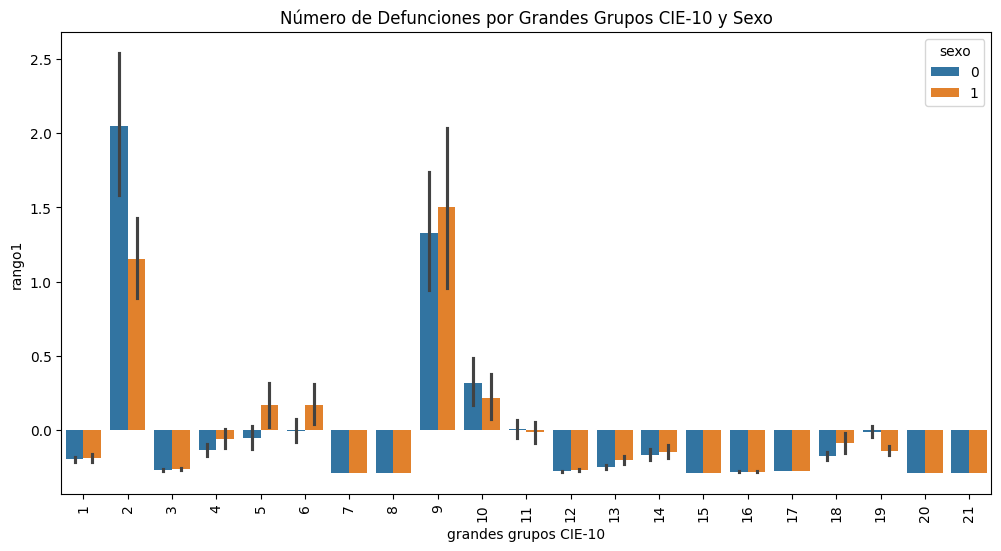

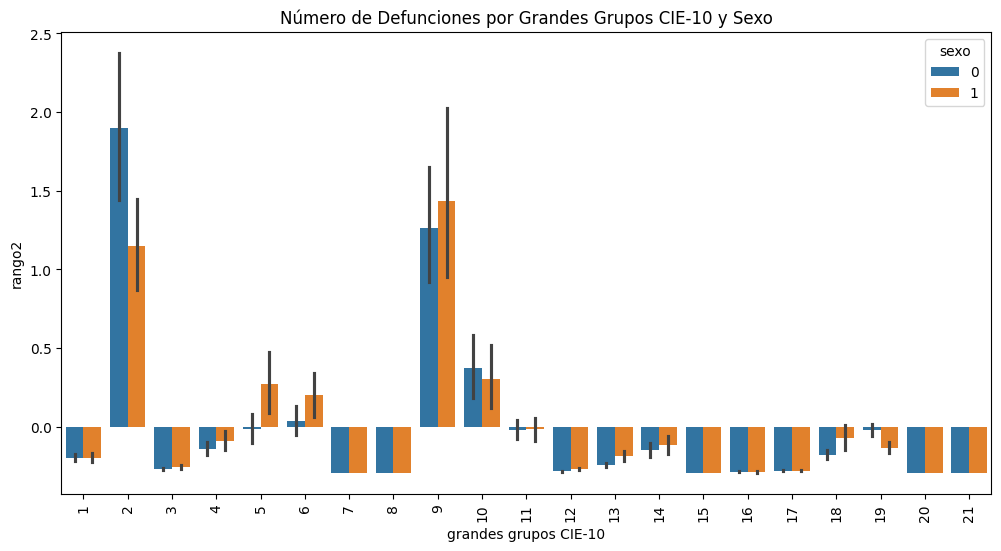

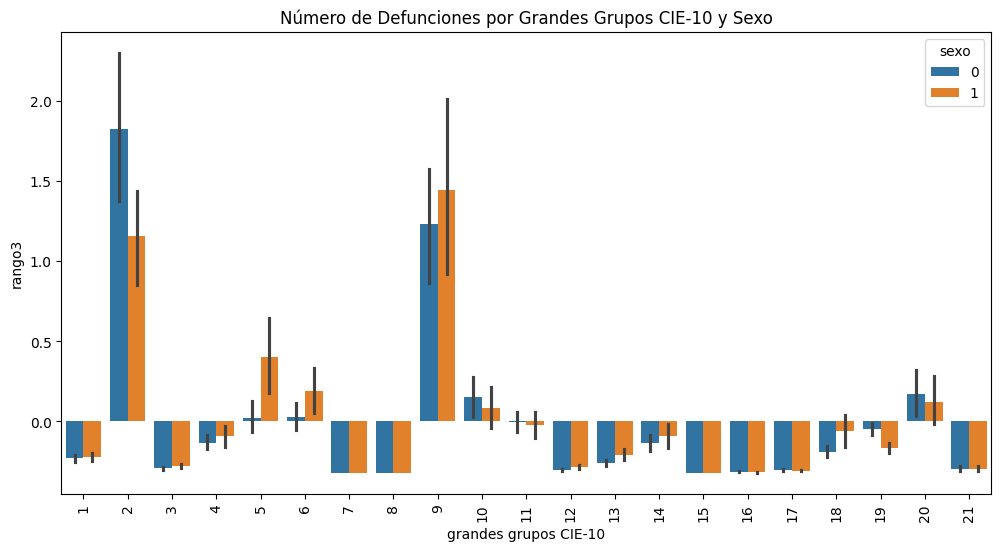

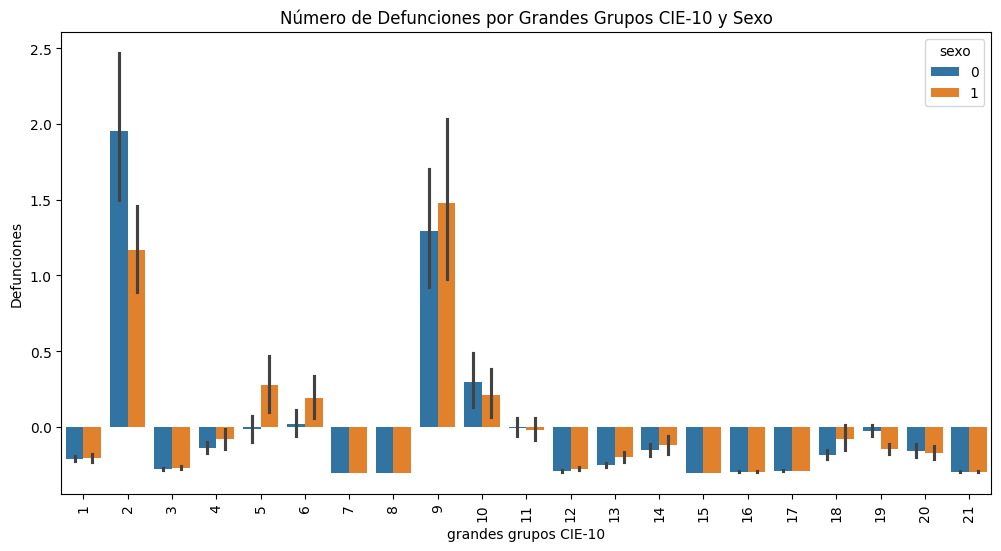

In [15]:
# Gráfico de barras combinado entre grandes grupos CIE-10 y sexo
plt.figure(figsize=(12,6))
sns.barplot(x='grandes grupos CIE-10', y='rango1', hue='sexo', data=defunciones)
plt.title('Número de Defunciones por Grandes Grupos CIE-10 y Sexo')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras combinado entre grandes grupos CIE-10 y sexo
plt.figure(figsize=(12,6))
sns.barplot(x='grandes grupos CIE-10', y='rango2', hue='sexo', data=defunciones)
plt.title('Número de Defunciones por Grandes Grupos CIE-10 y Sexo')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras combinado entre grandes grupos CIE-10 y sexo
plt.figure(figsize=(12,6))
sns.barplot(x='grandes grupos CIE-10', y='rango3', hue='sexo', data=defunciones)
plt.title('Número de Defunciones por Grandes Grupos CIE-10 y Sexo')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras combinado entre grandes grupos CIE-10 y sexo
plt.figure(figsize=(12,6))
sns.barplot(x='grandes grupos CIE-10', y='Defunciones', hue='sexo', data=defunciones)
plt.title('Número de Defunciones por Grandes Grupos CIE-10 y Sexo')
plt.xticks(rotation=90)
plt.show()

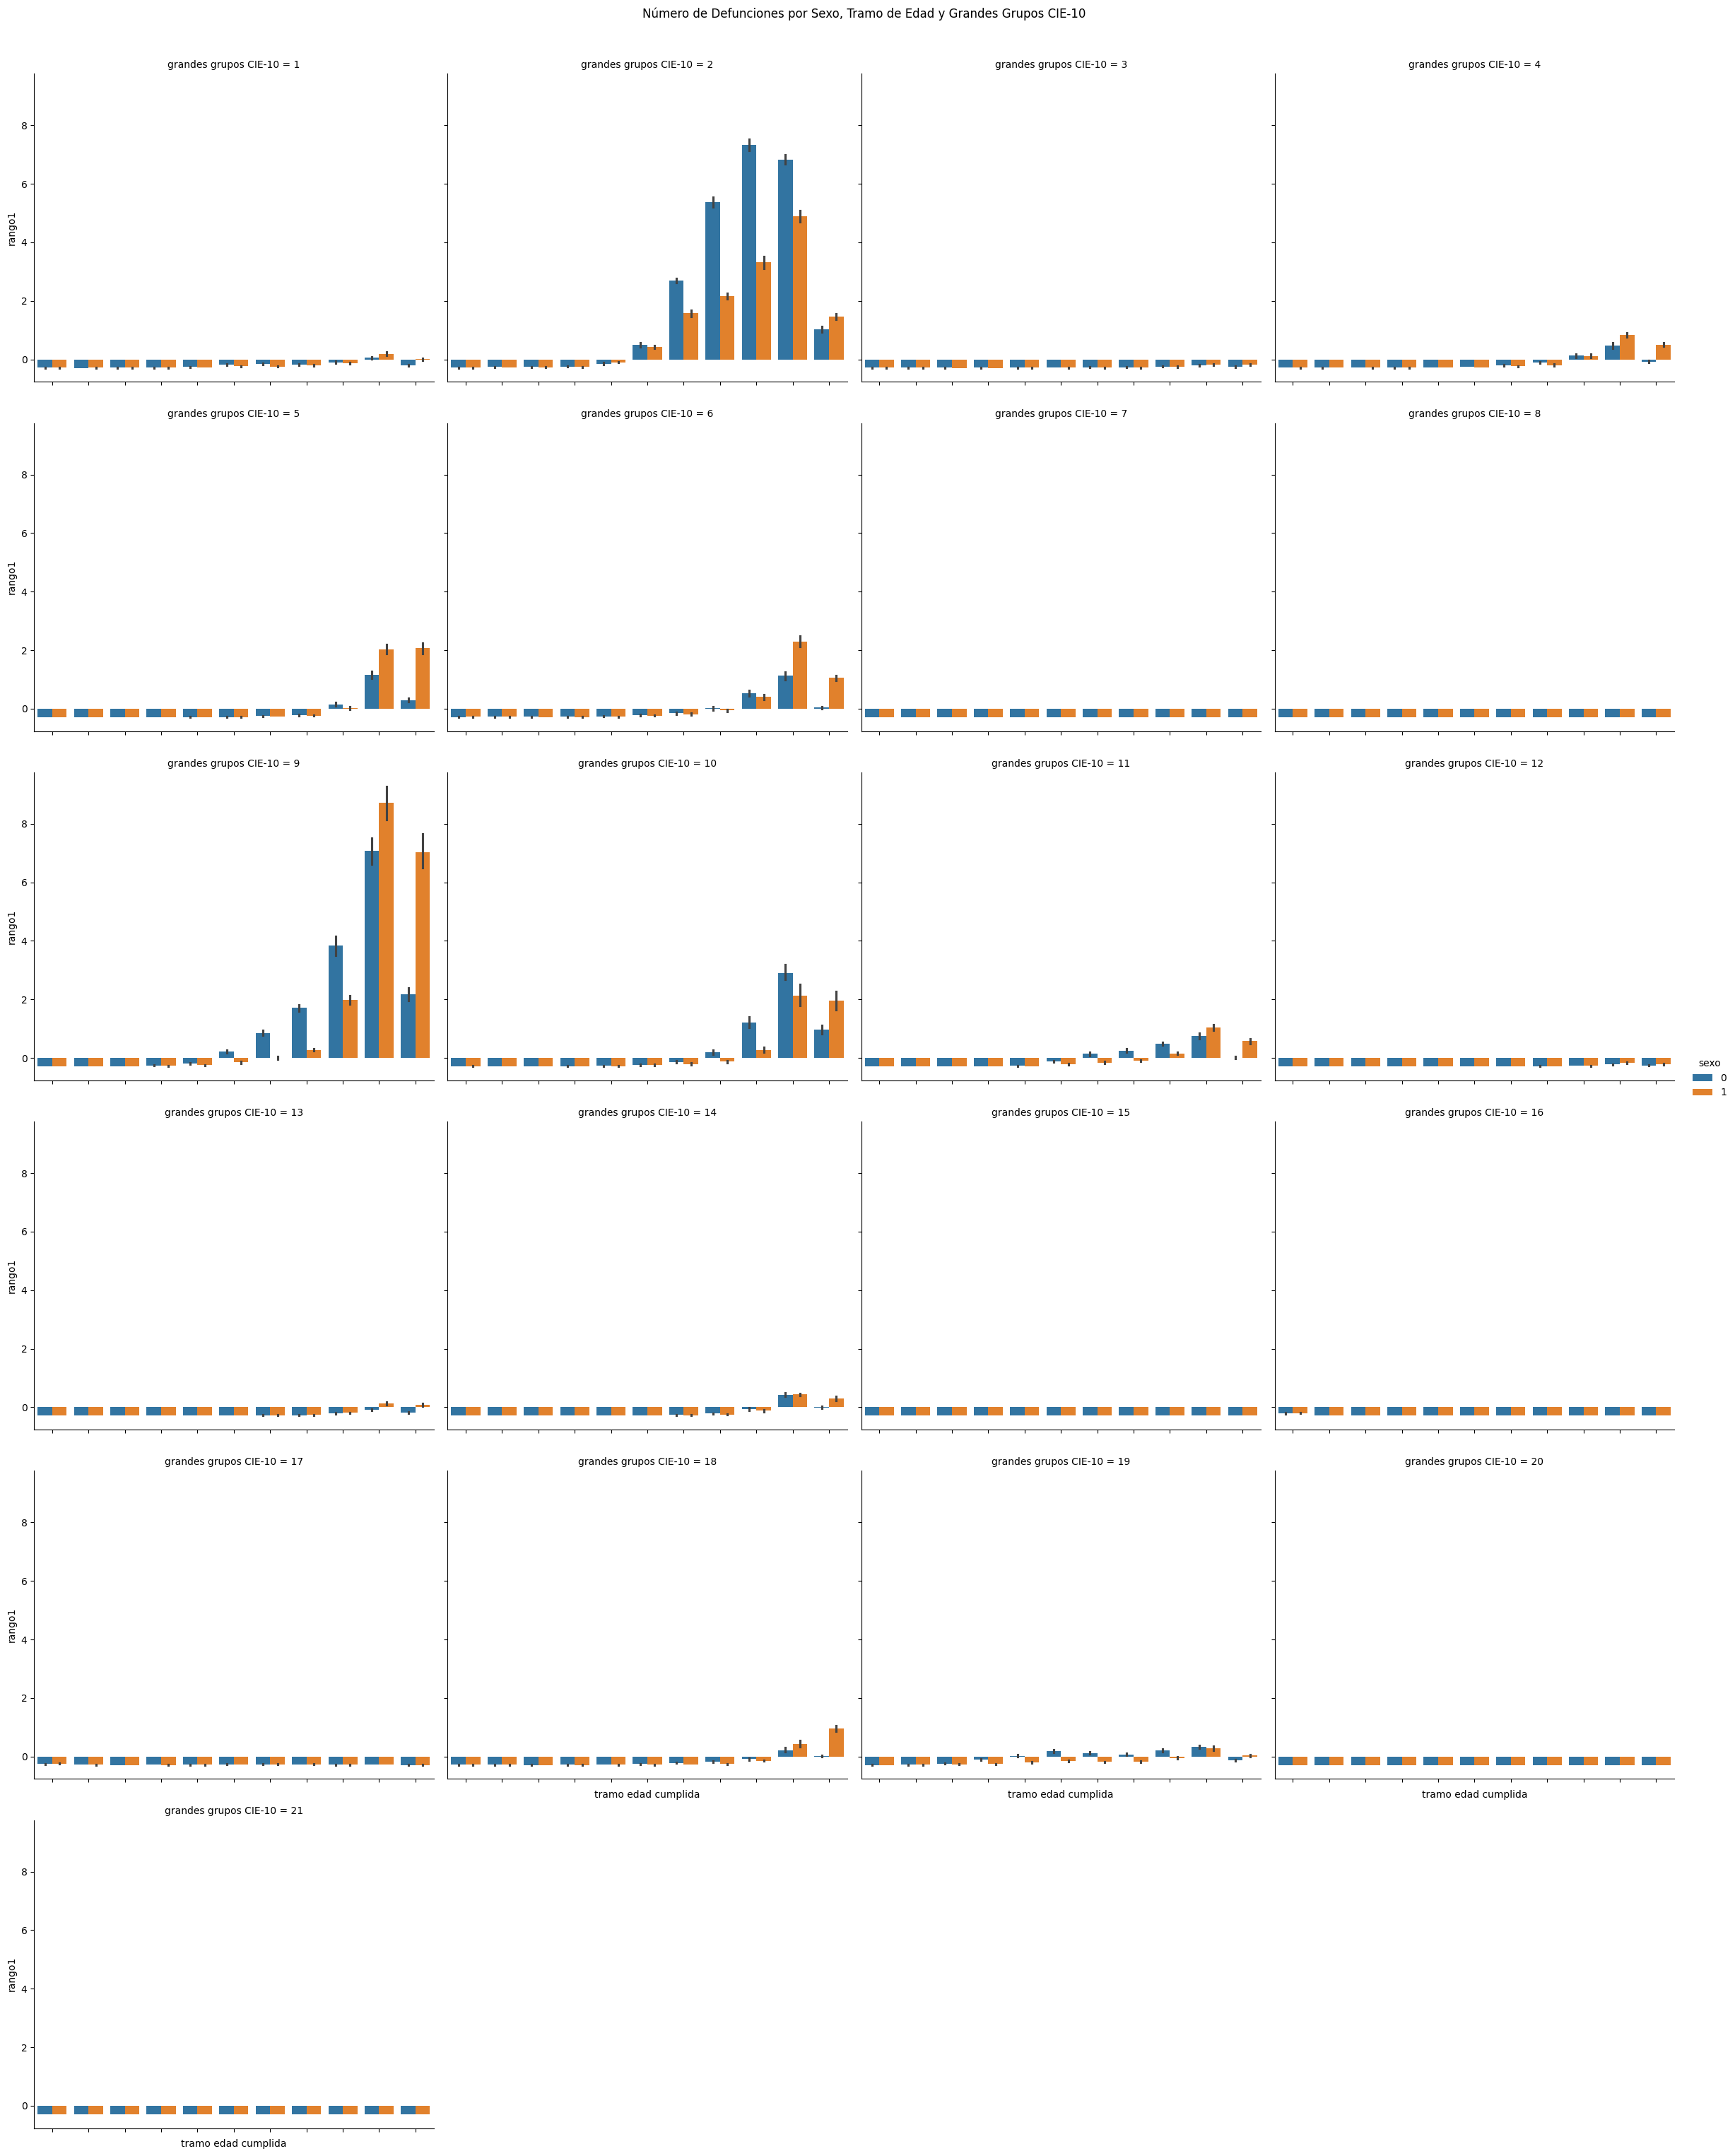

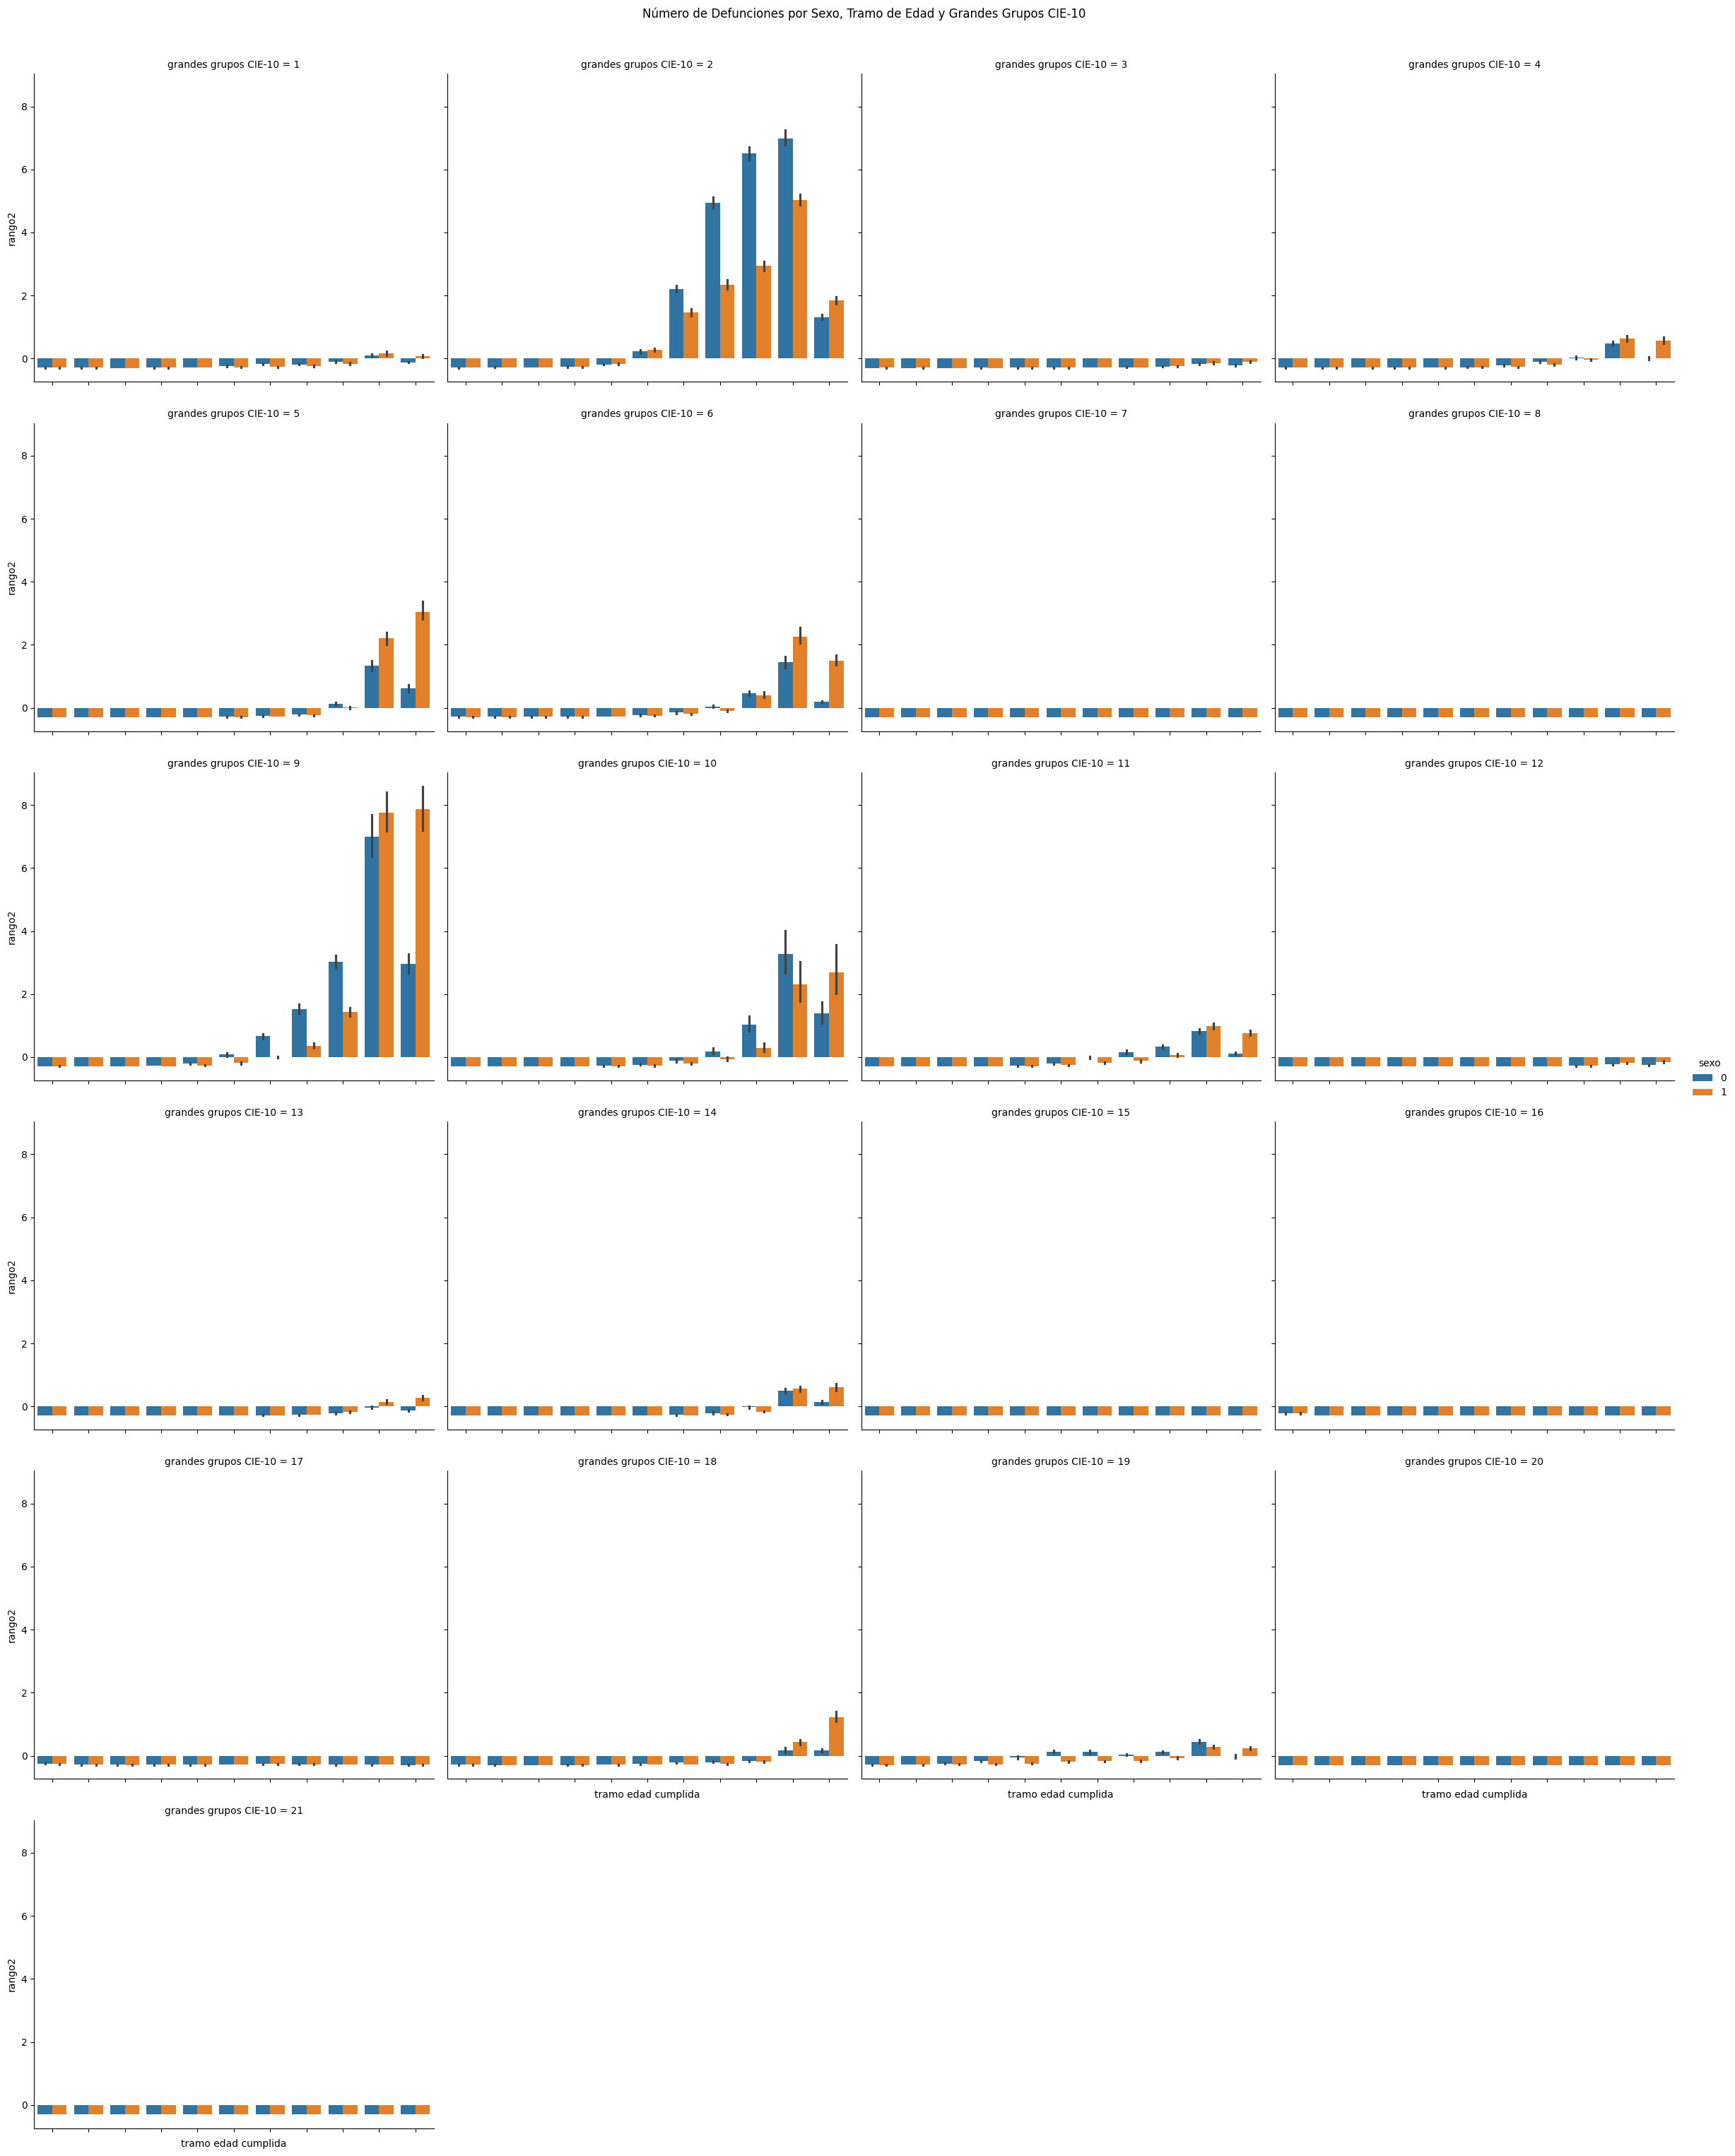

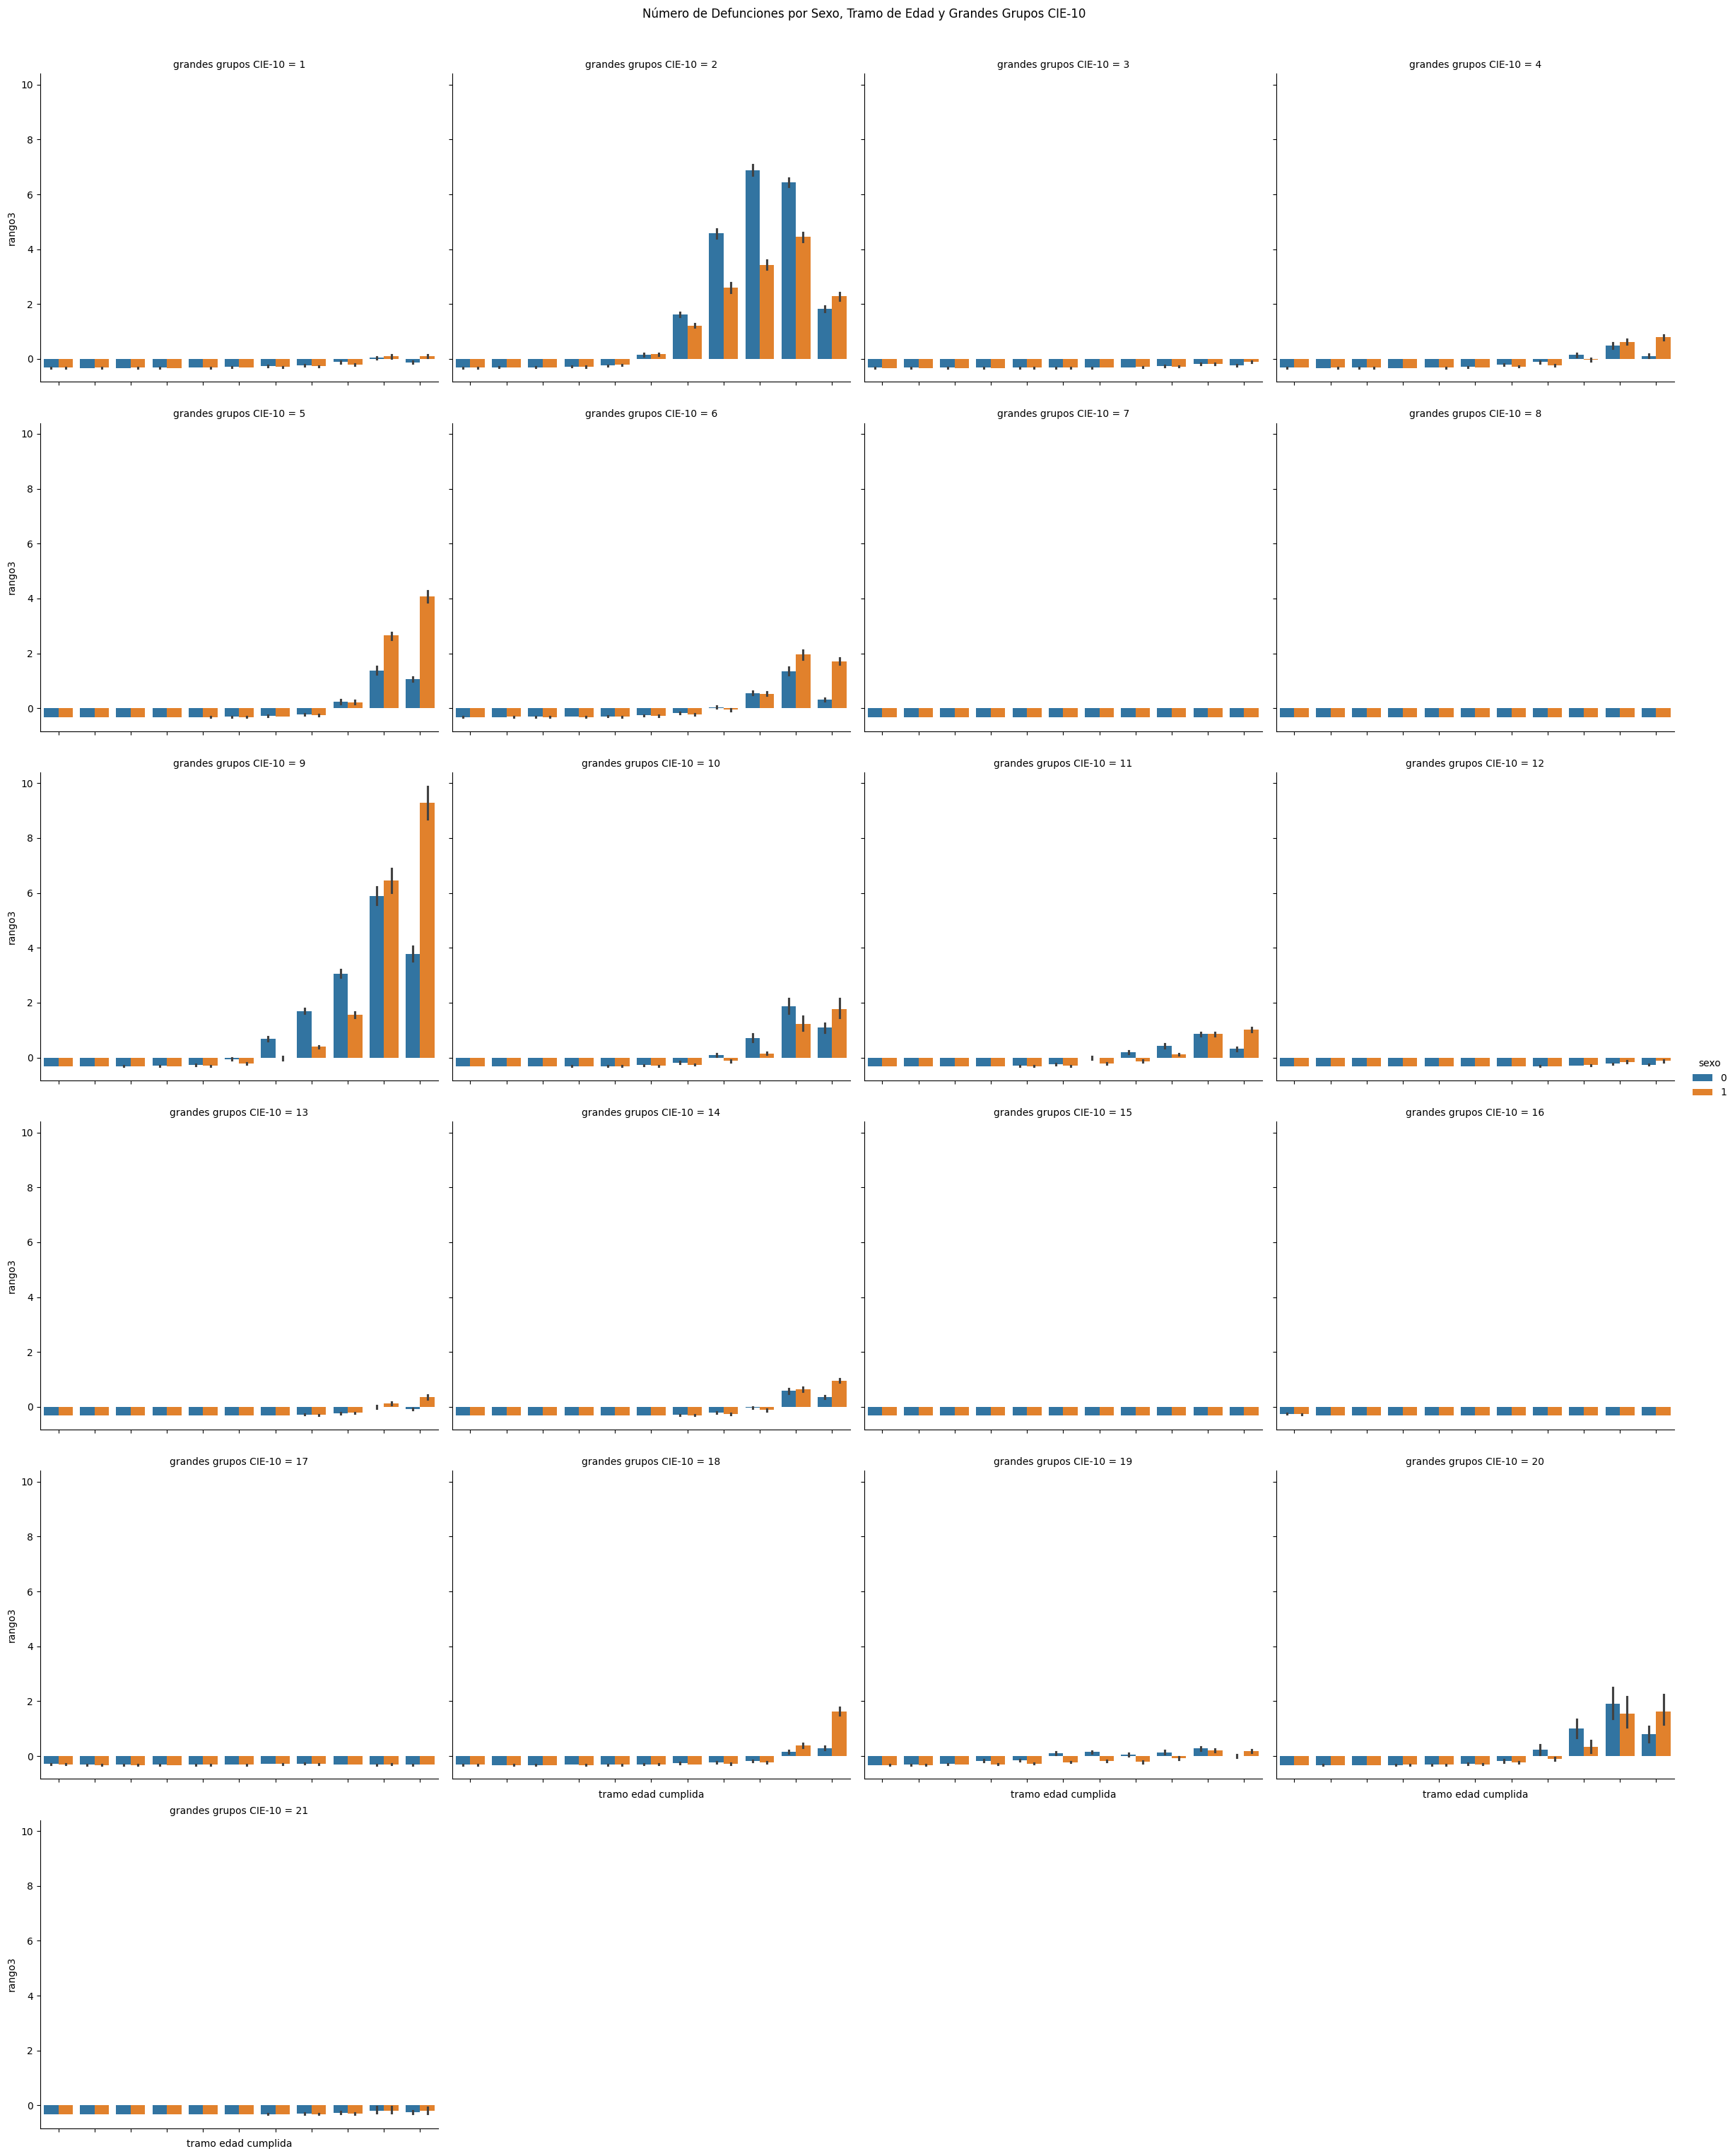

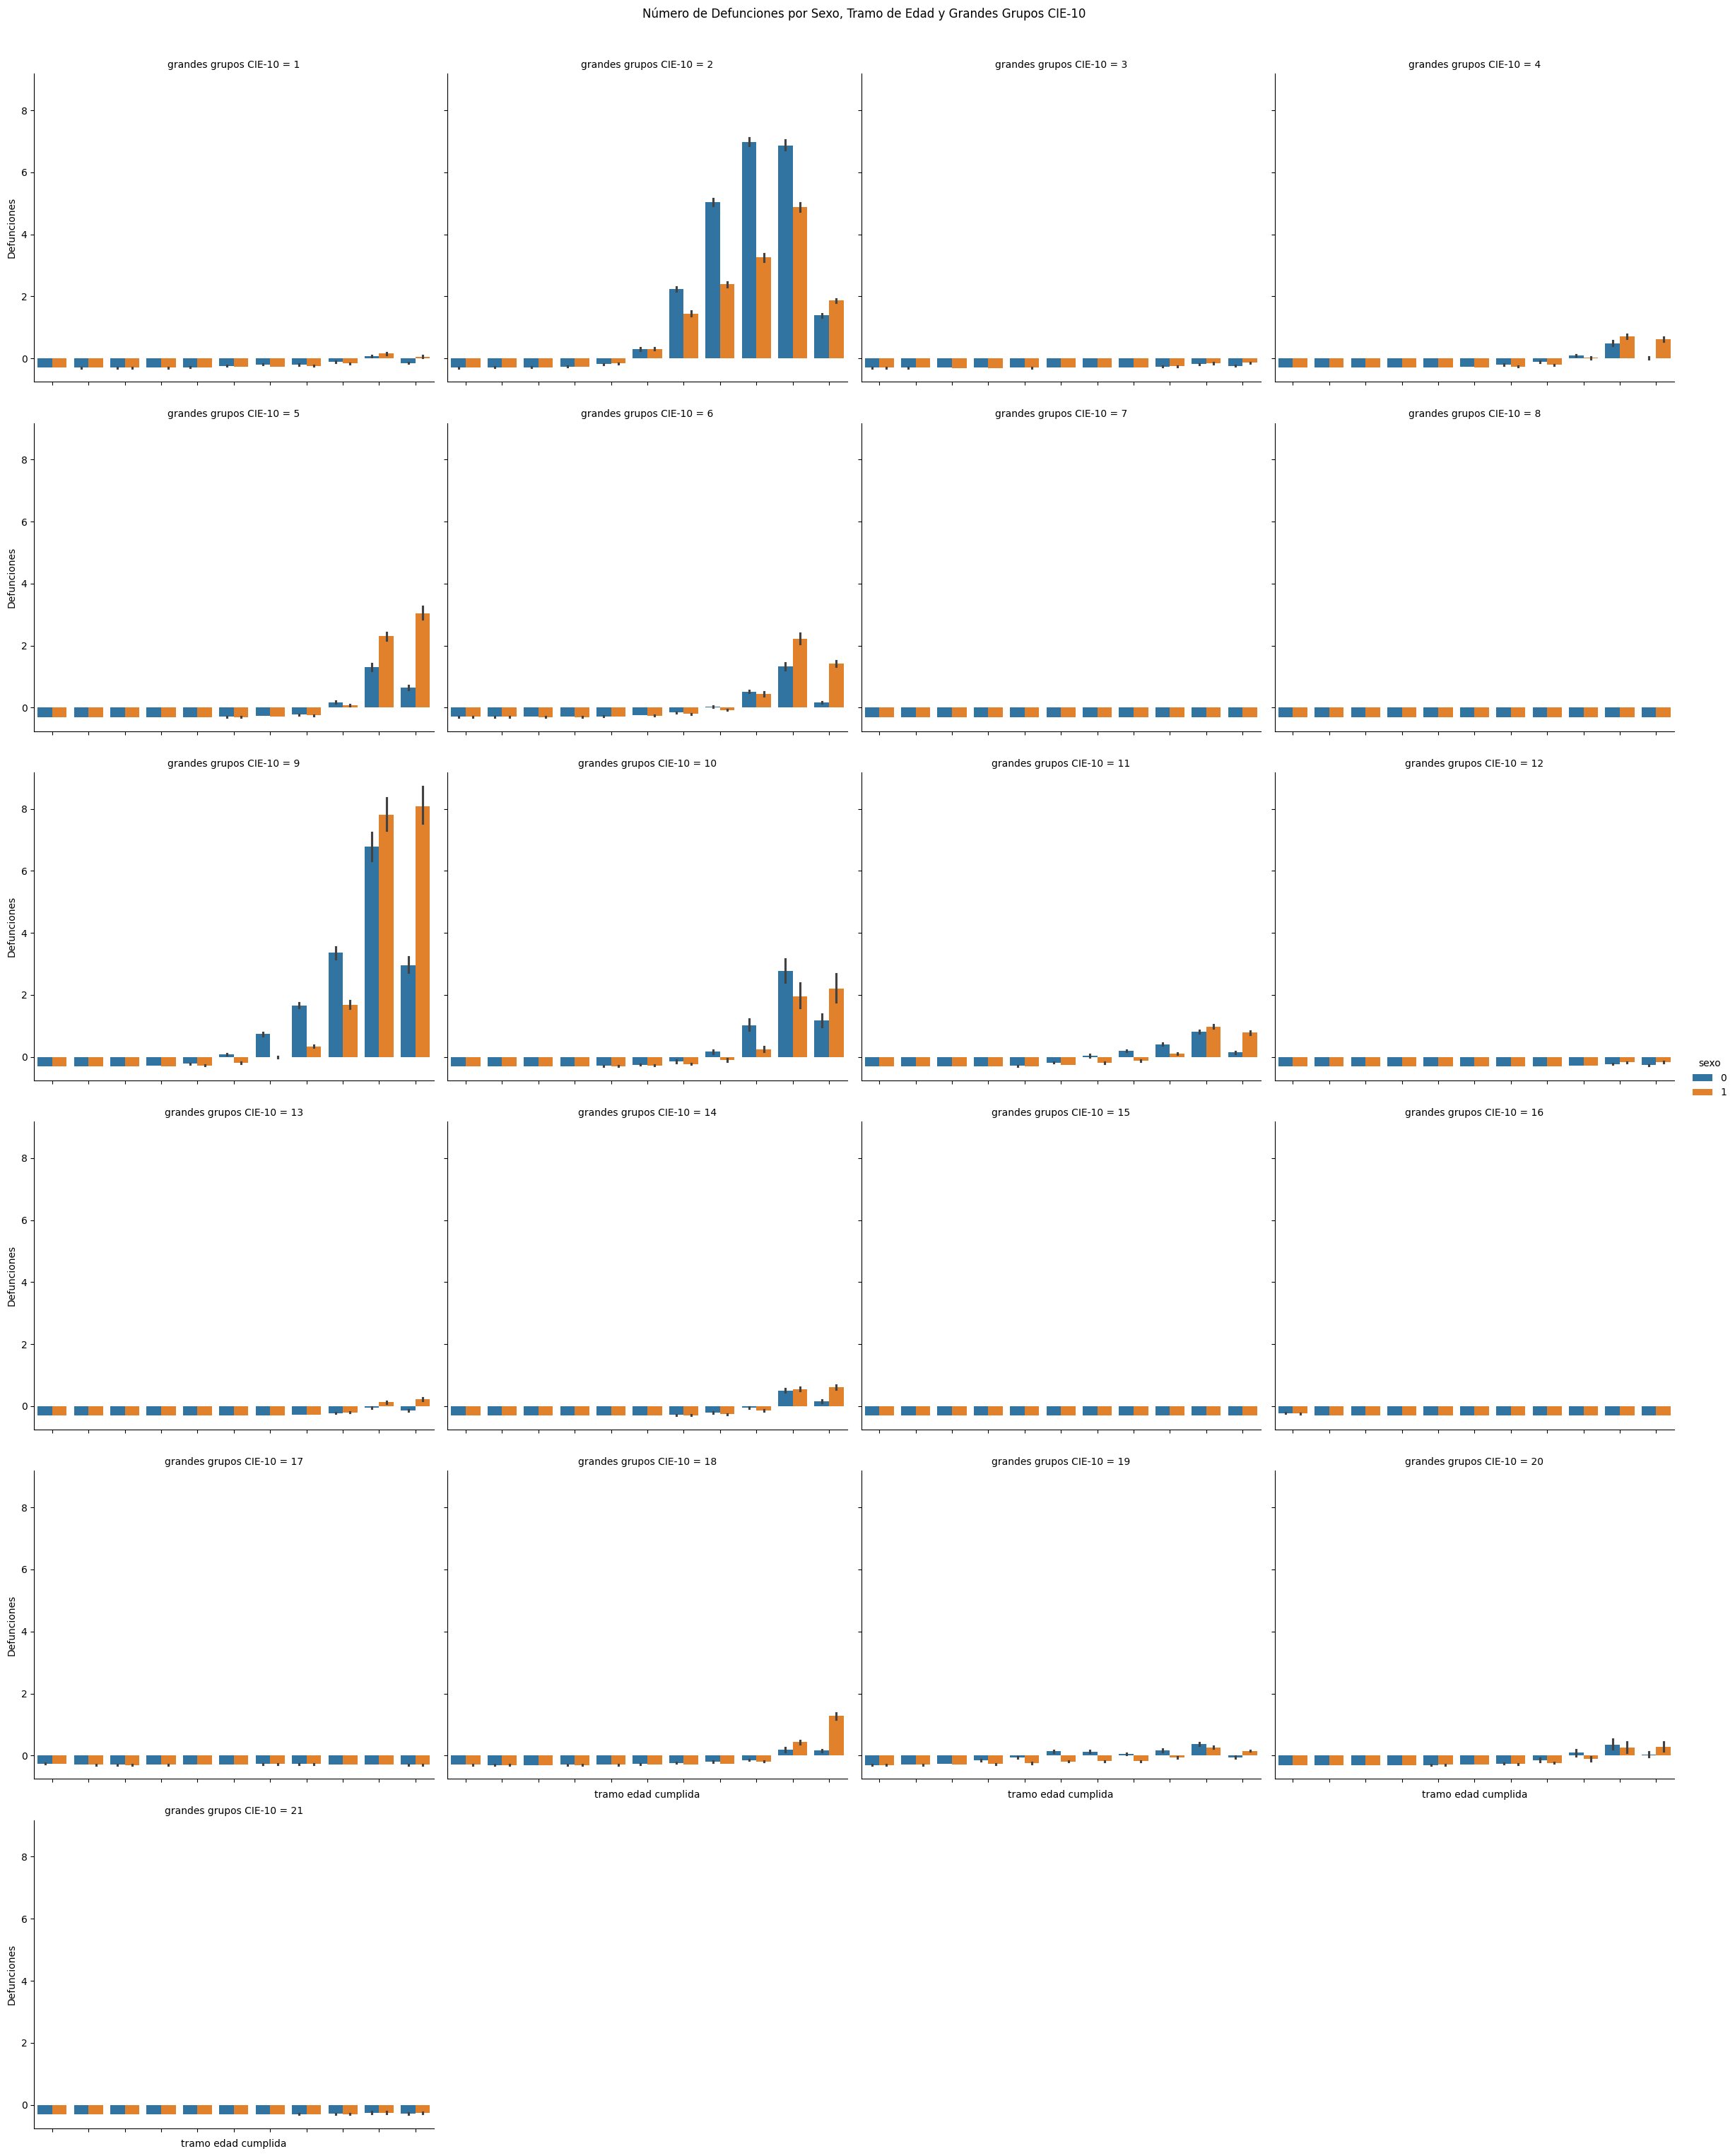

In [16]:
# Usar FacetGrid para visualizar múltiples variables
g = sns.catplot(x="tramo edad cumplida", y="rango1", hue="sexo", col="grandes grupos CIE-10", 
                data=defunciones, kind="bar", height=5, aspect=1.2, col_wrap=4)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Número de Defunciones por Sexo, Tramo de Edad y Grandes Grupos CIE-10', y=1.02)
plt.show()

g = sns.catplot(x="tramo edad cumplida", y="rango2", hue="sexo", col="grandes grupos CIE-10", 
                data=defunciones, kind="bar", height=5, aspect=1.2, col_wrap=4)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Número de Defunciones por Sexo, Tramo de Edad y Grandes Grupos CIE-10', y=1.02)
plt.show()

g = sns.catplot(x="tramo edad cumplida", y="rango3", hue="sexo", col="grandes grupos CIE-10", 
                data=defunciones, kind="bar", height=5, aspect=1.2, col_wrap=4)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Número de Defunciones por Sexo, Tramo de Edad y Grandes Grupos CIE-10', y=1.02)
plt.show()

g = sns.catplot(x="tramo edad cumplida", y="Defunciones", hue="sexo", col="grandes grupos CIE-10", 
                data=defunciones, kind="bar", height=5, aspect=1.2, col_wrap=4)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Número de Defunciones por Sexo, Tramo de Edad y Grandes Grupos CIE-10', y=1.02)
plt.show()